<a href="https://colab.research.google.com/github/neihtfool/softmax-MLP-with-and-without-keras/blob/master/MNIST_Softmax_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


y = 1


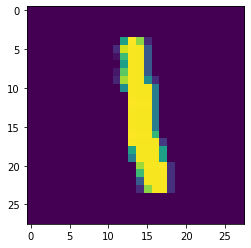

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 6
plt.imshow(x_train[i])
print("y = " + str(y_train[i]))

x_train, x_test = x_train / 255., x_test / 255.

In [4]:
x_train.shape

(60000, 28, 28)

# With Tensorflow.Keras

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])

In [6]:
preds = model(x_train[:1]).numpy()
preds


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.11708179, -0.39065248,  0.33906624, -0.6871149 , -0.17686728,
        -0.21643054, -0.89156383, -0.35665596, -0.23353086,  0.36341557]],
      dtype=float32)

In [7]:
tf.nn.softmax(preds).numpy()

array([[0.10519228, 0.08001541, 0.16599172, 0.05948694, 0.09908761,
        0.09524391, 0.04848759, 0.08278242, 0.09362906, 0.17008312]],
      dtype=float32)

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [9]:
loss_fn(y_train[:1], preds).numpy()

2.351314

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2967 - accuracy: 0.9134
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1427 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1068 - accuracy: 0.9676
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0877 - accuracy: 0.9733
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0733 - accuracy: 0.9771


In [12]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0658 - accuracy: 0.9784
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0592 - accuracy: 0.9805
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0536 - accuracy: 0.9829
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0487 - accuracy: 0.9840
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0467 - accuracy: 0.9844


In [13]:
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.0685 - accuracy: 0.9804


[0.06847326648716408, 0.9804]

In [0]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.7315444e-10, 6.4075403e-09, 3.6084220e-08, 6.3934804e-06,
        9.8682151e-15, 4.3914677e-10, 5.6504902e-18, 9.9999332e-01,
        7.1345752e-09, 2.6313427e-07],
       [2.3168447e-09, 9.7727366e-07, 9.9999893e-01, 5.2029499e-08,
        4.5734646e-21, 7.4507917e-12, 4.1069734e-11, 8.6613288e-18,
        2.8599829e-09, 4.2362467e-17],
       [2.2997739e-08, 9.9992335e-01, 5.3103163e-06, 5.9729352e-08,
        4.1716944e-06, 1.4498552e-07, 5.4079983e-06, 1.0738496e-05,
        5.0787290e-05, 1.2306915e-08],
       [9.9999630e-01, 9.2894975e-10, 4.5402530e-07, 1.0768625e-10,
        2.6654889e-10, 1.2216610e-06, 1.0675840e-06, 7.9701857e-07,
        8.8965879e-10, 1.4554971e-07],
       [5.4454738e-08, 6.6977359e-13, 1.1815063e-07, 3.8568128e-11,
        9.9891043e-01, 1.4239079e-09, 4.5288133e-09, 3.3191591e-06,
        5.3871538e-09, 1.0860772e-03]], dtype=float32)>

In [0]:
predictions = model.predict(x_test[:5])

Prediction: 7
True Label = 7


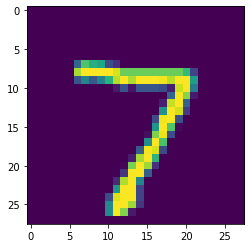

In [42]:
print("Prediction:",np.argmax(predictions[0]))
print("True Label =", y_test[0])
plt.imshow(x_test[0])

# L-Layer deep network without Tensorflow

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
t1 = x_train[0:10000]
t2 = x_test[0:200]
t3 = y_train[0:10000]
t4 = y_test[0:200]

train_x = t1.reshape((t1.shape[0], -1))
test_x = t2.reshape((t2.shape[0], -1))

enc = OneHotEncoder(sparse=False, categories='auto')
train_y = enc.fit_transform(t3.reshape(len(t3), -1))
test_y = enc.transform(t4.reshape(len(t4), -1))

print("train_x shape:", train_x.shape)
print("test_x shape:", test_x.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)

train_x shape: (10000, 784)
test_x shape: (200, 784)
train_y shape: (10000, 10)
test_y shape: (200, 10)


In [21]:
print(train_y.shape)
print(y_train.shape)

(10000, 10)
(60000,)


In [0]:
layer_dims = [784, 50, 10]

In [0]:
def init_params(layer_dims):
  parameters = {}
  L = len(layer_dims)
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

In [0]:
def forwardpass(X, parameters):
  caches = []
  A = X.T
  L = len(parameters) // 2
  
  for l in range(1, L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters["b" + str(l)], activation="sigmoid")
    caches.append(cache)
  
  AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="softmax")
  caches.append(cache)

  return AL, caches

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
  Z, linear_cache = linear_forward(A_prev, W, b)
  
  if activation == "relu":
    A, activation_cache = relu(Z)
  if activation == "sigmoid":
    A, activation_cache = sigmoid(Z)
  if activation == "softmax":
    A, activation_cache = softmax(Z)

  cache = (linear_cache, activation_cache)
  return A, cache

In [0]:
def linear_forward(A, W, b):
  Z = W.dot(A) + b
  cache = (A, W, b)
  return Z, cache

In [0]:
def relu(Z):
  A = np.maximum(0, Z)
  cache = Z
  return A, cache

In [0]:
def relu_backward(dA, cache):
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  
  return dZ

In [0]:
def sigmoid(Z):
  A = 1 / (1+np.exp(-Z))
  cache = Z 
  return A, cache

In [0]:
def sigmoid_backward(dA, cache):
  Z = cache
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1 - s)
  return dZ

In [0]:
def softmax(Z):
  e_x = np.exp(Z - np.max(Z))
  A = e_x / e_x.sum(axis=0, keepdims=True)
  cache = Z
  return A, cache

In [0]:
def sigmoid_derivative(Z):
  s = 1 / (1 + np.exp(-Z))
  return s * (1 - s)

In [0]:
def backwardpass(AL, Y, caches):
  grads = {}
  L = len(caches)
  n = AL.shape[1]
  Y = Y.reshape(AL.shape)

  # softmax derivation with cost function
  dAL = AL - Y
  curr_cache = caches[L-1]
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, curr_cache, activation="softmax")

  for l in reversed(range(L-1)):
    curr_cache = caches[l]
    dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l+1)], curr_cache, activation = "sigmoid")
    grads["dA" + str(l)] = dA_prev
    grads["dW" + str(l + 1)] = dW
    grads["db" + str(l + 1)] = db 

  return grads

In [0]:
def linear_activation_backward(dA, cache, activation):
  linear_cache, activation_cache = cache
  
  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
  if activation == "sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)
  elif activation == "softmax":
    dZ = dA
  
  dA_prev, dW, db = linear_backward(dZ, linear_cache)
  return dA_prev, dW, db

In [0]:
def linear_backward(dZ, cache):
  A_prev, W, b = cache
  n = A_prev.shape[1]

  dW = 1./n * np.dot(dZ, A_prev.T)
  db = 1./n * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T, dZ)

  return dA_prev, dW, db

In [0]:
def update_parameters(parameters, grads, learning_rate):
  L = len(parameters) // 2
  for l in range(1,L+1):
    parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
    parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
  return parameters

In [0]:
def model(X, Y, layer_dims, learning_rate = 0.001, epochs = 5, print_cost = True):
  costs = []
  parameters = init_params(layer_dims)
  for i in range(epochs):
    AL, caches = forwardpass(X, parameters)
    cost = -np.mean(Y * np.log(AL.T + 1e-8)) # add very small number 1e-8 to avoid log(0)
    grads = backwardpass(AL, Y, caches)
    parameters = update_parameters(parameters, grads, learning_rate)

    if print_cost and i % 100 == 0:
      print("Cost after iteration %i: %f" % (i, cost))
      if i % 5 == 0:
        costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per 100s)')
  plt.title("Learning rate = " + str(learning_rate))
  plt.show()

  return parameters

Cost after iteration 0: 0.230423
Cost after iteration 100: 0.230267
Cost after iteration 200: 0.230268
Cost after iteration 300: 0.230270
Cost after iteration 400: 0.230273
Cost after iteration 500: 0.230275
Cost after iteration 600: 0.230279
Cost after iteration 700: 0.230283
Cost after iteration 800: 0.230288
Cost after iteration 900: 0.230294


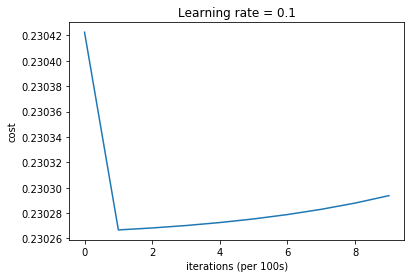

In [38]:
parameters = model(train_x, train_y, layer_dims, learning_rate=0.1, epochs=1000)

In [0]:
def predict(X, y, parameters):
    predictions, caches = forwardpass(X, parameters)
    return predictions.T

2
y = 2


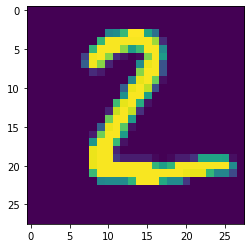

In [59]:
idx = 1
predictions_no_tf = predict(test_x, test_y, parameters)
print(np.argmax(predictions_no_tf[idx]))
print("y =", y_test[idx])
plt.imshow(x_test[idx])

4
y = 1


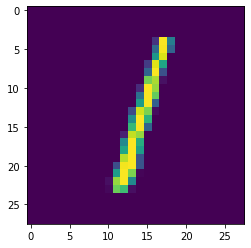

In [60]:
idx = 2
predictions_no_tf = predict(test_x, test_y, parameters)
print(np.argmax(predictions_no_tf[idx]))
print("y =", y_test[idx])
plt.imshow(x_test[idx])

The network doesn't seem to learn properly and therefore the model has poor performance regardless which hyperparameters are chosen. Needs to be investigated further, probably a mistake within the implementation (?)